Explained Variance Ratio: 
[0.24371481 0.20219249 0.12792728 0.12587914 0.12393003 0.12234448
 0.04731294 0.00669884]
Sum of Explained Variance Ratio: 
[0.24371481 0.44590729 0.57383458 0.69971372 0.82364375 0.94598822
 0.99330116 1.        ]


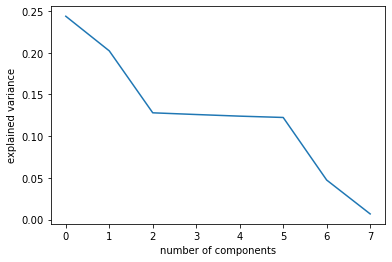

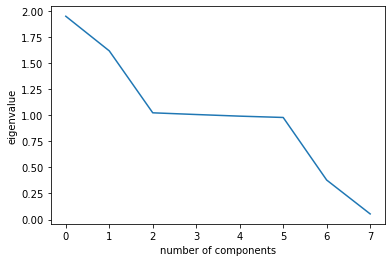

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
Children,0.004168,0.011684,-0.097931,0.782683,0.521272,-0.325341,-0.009272,-0.002494
Age,0.083635,0.701677,-0.015184,-0.001243,-0.019560,0.016778,-0.706747,-0.016348
Income,-0.005340,-0.008819,0.619695,0.377846,-0.021734,0.687450,-0.006403,-0.001812
VitD_levels,0.541343,-0.054689,0.276477,-0.310500,0.480643,-0.058646,-0.022910,0.544174
Doc_visits,-0.005775,0.013263,0.651712,0.077480,-0.395255,-0.642493,-0.005961,-0.000210
Initial_days,0.446024,-0.072838,-0.323980,0.377072,-0.583210,0.070023,-0.005868,0.451154
TotalCharge,0.702746,-0.079243,0.005009,-0.001869,-0.003625,-0.000829,0.020810,-0.706677
Additional_charges,0.084164,0.701915,0.000768,0.006223,-0.005408,0.012025,0.706650,0.025799


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

#Reads CSV to data frame
med_data= pd.read_csv('/Users/herlihpj/Desktop/Data Analytics/D206/ASSESSMENT/Medical Data/medical_clean_data.csv')

#print(med_data.corr())

#parse out only numerical values
med_data=med_data[['Children','Age','Income','VitD_levels', 
                   'Doc_visits','Initial_days','TotalCharge','Additional_charges']]

#Normalize the data
med_normalized=(med_data-med_data.mean())/med_data.std()

#.shape[1] means extracts all components from analysis
#n_components=2 #if you only want 2 components
pca = PCA(n_components=med_data.shape[1])

#CALL PCA on the dataset and creates new data set converting 8 variables into set of 8 components
pca.fit(med_normalized)

print('Explained Variance Ratio: ')
print(pca.explained_variance_ratio_)
print('Sum of Explained Variance Ratio: ')
print(pca.explained_variance_ratio_.cumsum())


med_pca = pd.DataFrame(pca.transform(med_normalized),
    columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'])

plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.show()


cov_matrix = np.dot(med_normalized.T, med_normalized) / med_data.shape[0]
eigenvalues = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for
eigenvector in pca.components_]

plt.plot(eigenvalues)
plt.xlabel('number of components')
plt.ylabel('eigenvalue')
plt.show() 


loadings = pd.DataFrame(pca.components_.T,
     columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'],
     index=med_data.columns)
loadings



In [ ]:
# 